# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции: 

$tg^2(sin(x) + cos(2x+3))$ 

в точке $x_0=1$


In [7]:
import sympy as sym

x = sym.symbols('x')
x0 = 1
f = sym.tan(sym.sin(x) + sym.cos(2*x + 3))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [8]:
d_f = sym.diff(f)
d_f

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [9]:
d_f.subs(x, x0).evalf()

55.3859176353379

## Задание 2

Дан объект в $2D$ пространстве

(-200.0, 200.0)

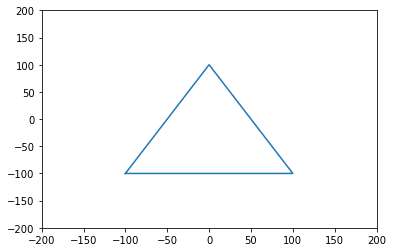

In [16]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


(-200.0, 200.0)

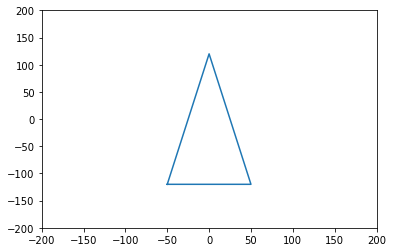

In [21]:
scaling = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])

B = np.matmul(A, scaling)

x = B[:,0]
y = B[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200]) 

(100.0, 300.0)

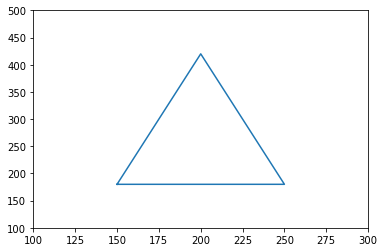

In [33]:
offset = np.array([[1, 0, 0], [0, 1, 0], [200, 300, 1]])

C = np.matmul(B, offset)

x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([100, 500])
plt.xlim([100, 300]) 

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [34]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [35]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`. 

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [36]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [37]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

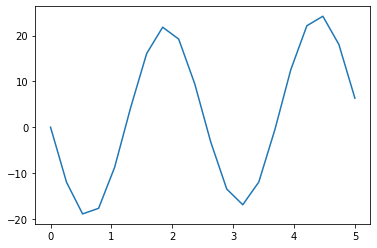

In [38]:
plt.plot(x, fx)
plt.show()

In [39]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [89]:
from scipy.optimize import minimize

res = minimize(error, [0, -1], method='Powell')
a_opt, b_opt = res.x

In [90]:
res

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 1.5103177384290234e-06
 message: 'Optimization terminated successfully.'
    nfev: 346
     nit: 7
  status: 0
 success: True
       x: array([ 3. , -2.5])

In [91]:
print(f'a={round(a_opt, 1)}, b={round(b_opt, 1)}')

a=3.0, b=-2.5


## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [95]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [96]:
# Транспонируем матрицу для удобства
raitings = raitings.T
raitings

array([[ 4,  9,  1,  6,  3,  8,  9,  4,  2,  5],
       [ 4,  2,  6,  1,  7,  3,  8,  1,  7, 10],
       [ 9,  5,  8,  9,  3,  7,  4,  6,  7,  8],
       [ 4, 10,  8,  7,  5,  3,  8,  4,  6,  8],
       [ 1,  7,  4,  7,  7,  8,  8,  3, 10,  9],
       [ 6,  8,  9,  9,  9,  6, 10, 10,  6,  7],
       [10, 10,  3,  2,  9,  1,  6,  4,  8,  2],
       [ 7,  5,  8,  3,  6,  8,  1,  4,  9,  9],
       [ 9,  6, 10,  5,  2,  8,  1,  2,  8,  9],
       [ 6,  2,  5,  1,  9,  6,  2,  8,  6, 10],
       [ 9,  1,  2,  6,  1,  1,  9,  7, 10,  8],
       [ 2,  6,  6,  6,  2,  9,  5,  9,  1,  8],
       [ 8,  8,  8,  3,  8,  4,  2,  3,  7,  8],
       [ 6,  9,  1,  2, 10, 10,  7,  8, 10,  6],
       [ 6,  7,  6,  7,  6,  1,  2,  3,  4, 10]])

In [103]:
similarity = {}


for i in range(len(raitings)):
    temp_sim = {}
    
    for j in range(len(raitings)):
        if i == j:
            continue
        
        users_dot = np.dot(users[i], users[j]) # скалярное произведение векторов
        norm_1, norm_2 = np.linalg.norm(users[i]), np.linalg.norm(users[j]) # нормы векторов
        result = users_dot / (norm_1 * norm_2)
        
        temp_sim[result] = j
        
    similarity[i] = temp_sim[min(temp_sim.keys())]
    
[print(f'Для пользователя {user+1} наиболее похожий пользователь - {similarity[user]+1}') for user in similarity.keys()]

Для пользователя 1 наиболее похожий пользователь - 10
Для пользователя 2 наиболее похожий пользователь - 1
Для пользователя 3 наиболее похожий пользователь - 7
Для пользователя 4 наиболее похожий пользователь - 10
Для пользователя 5 наиболее похожий пользователь - 7
Для пользователя 6 наиболее похожий пользователь - 9
Для пользователя 7 наиболее похожий пользователь - 9
Для пользователя 8 наиболее похожий пользователь - 1
Для пользователя 9 наиболее похожий пользователь - 1
Для пользователя 10 наиболее похожий пользователь - 1


[None, None, None, None, None, None, None, None, None, None]